In [2]:
from utils import readStructs
from analysis import bondAnalysis
import numpy as np
%matplotlib inline
s = readStructs("../scc.cf4.out/", shallow = False, name = 'slab')
for i in s['geom']:
    i.wrap()

In [19]:
from ase.visualize import view
view(s['geom'])

In [3]:
bonds, combos, combolists = bondAnalysis(data = s['geom'], focusElement = "C")

In [45]:
# bonds.hist(figsize = (7,7), bins = np.arange(1,5), grid = False);

In [5]:
combos

NSi       9
FN       12
F2Si2     5
HF2Si     5
F3Si      7
F2NSi     3
N         7
HFSi2     5
FSi2      1
F2Si      5
F3N       3
N2Si      1
NSi2      1
F2N       3
HFSi      2
HSi2      1
FNSi      4
FN2Si     1
FSi       1
HFN       2
dtype: int64

Text(0.5, 0, 'count of occurrences (across 170 trajectories)')

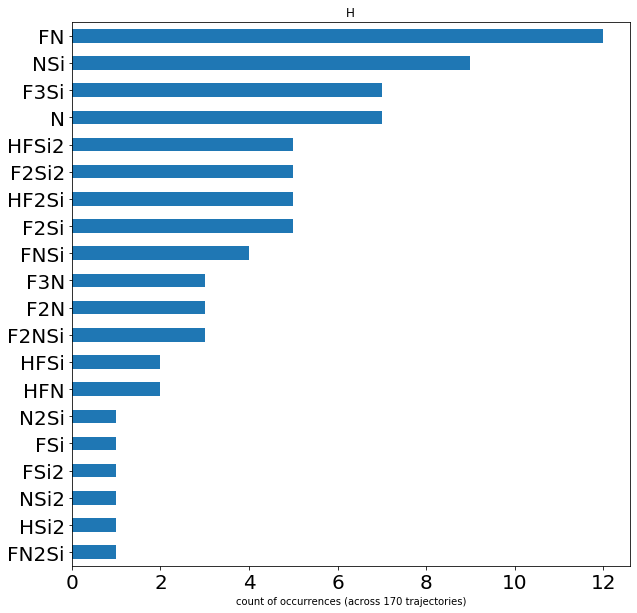

In [4]:
ax = combos.sort_values().iloc[:30].plot(kind = 'barh', 
                                  figsize = (10,10), 
                                  title = "H", 
                                  fontsize = 20) 
ax.set_xlabel("count of occurrences (across 170 trajectories)")

In [48]:
#visualize neighbor structures, using an option from the list above

frag = 'Si'
wrap = True
vislist = [s['geom'][i].copy() for i, j in combolists[frag]]
print('number of occurrences in 170 simulations:', len([i for i, j in combolists[frag]]))
if wrap:
    for i in vislist:
        i.wrap()
view(vislist)


number of occurrences in 170 simulations: 3379


Text(0.5, 0, 'step')

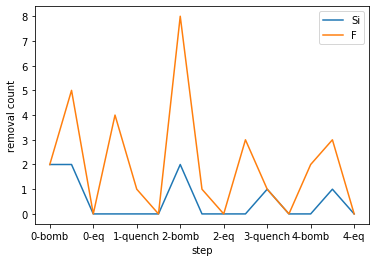

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
d = pd.read_csv("../agg.csv", index_col=0)
d.T.plot(x = None, y = ["Si", "F"])
plt.ylabel("removal count")
plt.xlabel("step")